In [1]:
from numpy import *
from pylab import imshow, gray, show
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

### Problem 1 - Relaxation method using Poisson equation

In [3]:
M1 = 100
V1 = 1.0
target1 = 1e-1

p_dens = 1
a, e0 = 1, 1

phi = zeros([M1+1, M1+1], float)
phiprime = empty([M1+1, M1+1], float)

phi[0,:], phiprime[0,:] = V1, V1

In [5]:
delta = 1.0

while delta > target1:
    for i in range(M1):
        for j in range(M1):
            if ((i>=20 and i<=40) and (j>=60 and j<=80)):
                phiprime[i,j]= 0.25*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1] + 1)
            elif ((i>=60 and i<=80) and (j>=20 and j<=40)):
                phiprime[i,j]= 0.25*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1] - 1)
            else:
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4
                
    delta = np.max(np.abs(phi - phiprime))
    phi, phiprime = phiprime, phi

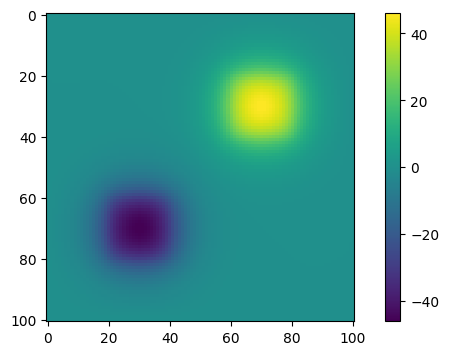

In [11]:
figure(figsize=(8,4))
imshow(phi, cmap='viridis')
colorbar()
show()

### Problem 2 - Use the Gauus-Seidel method to solve the Laplace equation

In [13]:
from time import monotonic

M2 = 71
tol = 1e-4
q = 1.0
e0 = 1.0
L = 1.0
w = 0.9
V2 = 1.0
errmax = 10
err = 10

a = L/M2
p = q/(a**2)

phi = zeros([M2, M2], float)
phi[0, :] = V2

t1 = monotonic()

In [15]:
while (abs(errmax > tol)):
    errmax = 0
    for i in range(1, M2-1):
        for j in range(1, M2-1):
            phiprime = (1/4)*(phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])# + (p*a*a/e0))
            delta = phiprime - phi[i, j]
            phi[i, j] += (1 + w)*delta
                
            err = np.abs(delta)
            if (abs(err) > errmax):
                errmax = err

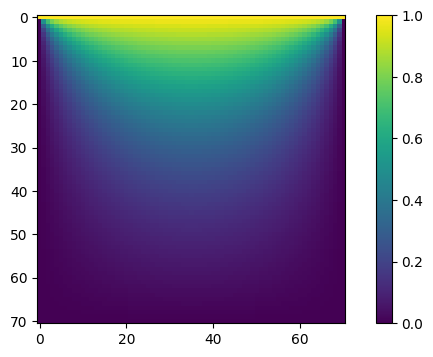

tempo gasto: 6.187 s


In [18]:
t2 = monotonic()
figure(figsize=(8,4))
imshow(phi, cmap='viridis')
colorbar()
show()

print(f'tempo gasto: {t2-t1:.3f} s')

### Problem 3 - Eletronic capacitors

In [25]:
M3 = 100
V3 = 1.0
a, e0 = 1, 1
target3 = 1e-4

rho = 1

phi = zeros([M3+1, M3+1], float)
phi[20:80, 20], phi[20:80, 80] = V3, -V3
phiprime = empty([M3+1, M3+1], float)

In [27]:
delta = 10

while abs(delta) > target3:
    for i in range(M3):
        for j in range(M3):
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4
                
    delta = np.max(np.abs(phi-phiprime))
    phi, phiprime = phiprime, phi

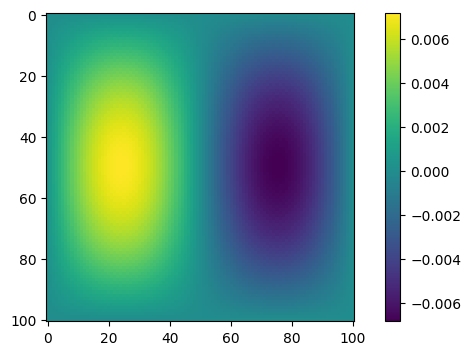

In [29]:
figure(figsize=(8,4))
imshow(phi, cmap='viridis')
colorbar()
show()

### Problem 4 - Thermal diffusion in the earth's crust

In [31]:
def funcT(t):
    return 10 + 12*np.sin(2*pi*t/365)

In [33]:
L = 20.0
D = 0.05
N = 100
a = L/N
h = 0.1
epsilon = h/1000

T = np.ones(N) * 10
T[N-1] = 11.0

t1, t2, t3, t4 = 3375, 3465, 3555, 3650
tend = t4 + epsilon

In [35]:
Tp = np.ones(N) * 10

x = linspace(0, L ,N)

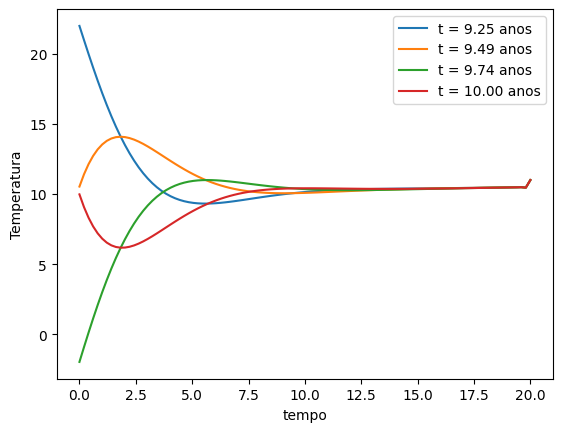

<Figure size 800x400 with 0 Axes>

In [37]:
t = 0.0
c = h*D/(a**2)
while t<tend:

    Tp[0] = funcT(t)
    
    for i in range(1, N-1):
        Tp[i] = T[i] + c*(T[i+1] + T[i-1] -2*T[i])
        
    t += h
    T, Tp = Tp, T
    
    if (abs(t-t1)<epsilon) or (abs(t-t2)<epsilon) or (abs(t-t3)<epsilon) or (abs(t-t4)<epsilon):
        ty = t/365
        plot(x, T,label="t = %.2f anos" % ty )

legend()
xlabel('tempo')
ylabel('Temperatura')
figure(figsize=(8,4))
show()

### The next i will share some intersting interactive plots using celluloid library

This libraries are to make a interactive plots using celluloid

In [50]:
from celluloid import Camera # importando a camera
import seaborn as sns
import warnings
from IPython.display import HTML # para mostrar o vídeo no jupyter

PROBLEM 1 - rotating charges

In [39]:
N = 20
r = 25
all_thetas = linspace(0, 2*pi, N)
# theta = 40*pi/180

In [41]:
M = 100
V = 1.0
target = 0.1

p_dens = 1
a, e0 = 1, 1

In [43]:
def celluloid(list, title, interval=400):
    
    fig, ax = plt.subplots(figsize=(5, 3)) # criando minha fig    
    camera = Camera(fig)# a camera recebe a figura que vamos usar
    ax.set_title(f'{title}')
    
    for figure in list:
        ax.imshow(figure, cmap='viridis')
        camera.snap() # tirar foto da fig

    animation = camera.animate() # animação pronta!
    
    plt.close(fig)
    return HTML(animation.to_html5_video()) #mostrando a animação no notebook

In [45]:
def potentials(x1, y1, x2, y2, phi, phiprime):

    delta = 1.0
    while delta > target:
        for i in range(-M, M):
            for j in range(-M, M):
                if ((i>=y1-10 and i<=y1+10) and (j>=x1-10 and j<=x1+10)):
                    phiprime[i,j]= 0.25*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1] + 1)
                elif ((i>=y2-10 and i<=y2+10) and (j>=x2-10 and j<=x2+10)):
                    phiprime[i,j]= 0.25*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1] - 1)
                else:
                    phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4
                    
        delta = np.max(np.abs(phi - phiprime))
        phi, phiprime = phiprime, phi
        
    return phi

In [ ]:
list_figs = []

for theta in all_thetas:
    x1 = r*cos(theta)+50
    x2 = M - x1
    y1 = r*sin(theta)+50
    y2 = M - y1

    phi = zeros([M+1, M+1], float)
    phiprime = empty([M+1, M+1], float)
    phi[0,:], phiprime[0,:] = V, V

    new_phiprime = potentials(x1, y1, x2, y2, phi, phiprime)
    
    list_figs.append(new_phiprime)

celluloid(list_figs, 'Two charges rotating')

# imshow(new_phiprime, cmap='viridis')  # Exibe a imagem com colormap 'viridis'
# colorbar()
# show()

PROBLEM 2 - descending the potential

In [ ]:
M2 = 71
tol = 1e-4
q = 1.0
e0 = 1.0
L = 1.0
w = 0.9
V2 = 1.0
errmax = 10
err = 10

a = L/M2
p = q/(a**2)



In [ ]:
def potentials2(phi):

    while (abs(errmax > tol)):
        errmax = 0
        for i in range(1, M2-1):
            for j in range(1, M2-1):
                phiprime = (1/4)*(phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])# + (p*a*a/e0))
                delta = phiprime - phi[i, j]
                phi[i, j] += (1 + w)*delta
                    
                err = np.abs(delta)
                if (abs(err) > errmax):
                    errmax = err

In [ ]:
print(len(phi[0]))

In [ ]:
for i in range(M2):
    
    phi = zeros([M2, M2], float)
    phi[i, :] = V2

    new_phiprime2 = potentials2(phi)



celluloid(list, title, interval=400):

In [ ]:
figure(figsize=(8,4))
imshow(phi, cmap='viridis')
colorbar()
show()

print(f'tempo gasto: {t2-t1:.3f} s')

PROBLEM 3 - modifying the potential values

PROBLEM 4 - interactive timeline